In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
class_name = 'Occupancy'
df1 = pd.read_csv('datatraining.txt', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)
df2 =pd.read_csv('datatest.txt', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)
df3=pd.read_csv('datatest2.txt', skipinitialspace=True, na_values='?', 
                 keep_default_na=True)
df4=pd.merge(df1, df2, how='outer')
df=pd.merge(df4, df3, how='outer')
df.shape



(20560, 7)

In [3]:
df['Day']=pd.to_datetime(df['date']).dt.day
df['Hour']=pd.to_datetime(df['date']).dt.hour
df['Month']=pd.to_datetime(df['date']).dt.month
df['Year']=pd.to_datetime(df['date']).dt.year
df['Data']=pd.to_datetime(df['date']).dt.normalize()
del df['date']
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Day,Hour,Month,Year,Data
0,23.18,27.2720,426.0,721.25,0.004793,1,4,17,2,2015,2015-02-04
1,23.15,27.2675,429.5,714.00,0.004783,1,4,17,2,2015,2015-02-04
2,23.15,27.2450,426.0,713.50,0.004779,1,4,17,2,2015,2015-02-04
3,23.15,27.2000,426.0,708.25,0.004772,1,4,17,2,2015,2015-02-04
4,23.10,27.2000,426.0,704.50,0.004757,1,4,17,2,2015,2015-02-04


In [4]:
df.isna().sum().to_dict().items()

dict_items([('Temperature', 0), ('Humidity', 0), ('Light', 0), ('CO2', 0), ('HumidityRatio', 0), ('Occupancy', 0), ('Day', 0), ('Hour', 0), ('Month', 0), ('Year', 0), ('Data', 0)])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20560 entries, 0 to 20559
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Temperature    20560 non-null  float64       
 1   Humidity       20560 non-null  float64       
 2   Light          20560 non-null  float64       
 3   CO2            20560 non-null  float64       
 4   HumidityRatio  20560 non-null  float64       
 5   Occupancy      20560 non-null  int64         
 6   Day            20560 non-null  int64         
 7   Hour           20560 non-null  int64         
 8   Month          20560 non-null  int64         
 9   Year           20560 non-null  int64         
 10  Data           20560 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 1.9 MB


In [6]:
df.shape

(20560, 11)

In [7]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Day,Hour,Month,Year
count,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.000000,20560.0,20560.0
mean,20.906212,27.655925,130.756622,690.553276,0.004228,0.231031,10.073249,11.446887,2.0,2015.0
std,1.055315,4.982154,210.430875,311.201281,0.000768,0.421503,4.729430,7.075840,0.0,0.0
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000,2.000000,0.000000,2.0,2015.0
25%,20.200000,24.500000,0.000000,460.000000,0.003719,0.000000,6.000000,5.000000,2.0,2015.0
50%,20.700000,27.290000,0.000000,565.416667,0.004292,0.000000,10.000000,11.000000,2.0,2015.0
75%,21.525000,31.290000,301.000000,804.666667,0.004832,0.000000,14.000000,18.000000,2.0,2015.0
max,24.408333,39.500000,1697.250000,2076.500000,0.006476,1.000000,18.000000,23.000000,2.0,2015.0


In [8]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Day,Hour,Month,Year,Data
0,23.18,27.2720,426.0,721.25,0.004793,1,4,17,2,2015,2015-02-04
1,23.15,27.2675,429.5,714.00,0.004783,1,4,17,2,2015,2015-02-04
2,23.15,27.2450,426.0,713.50,0.004779,1,4,17,2,2015,2015-02-04
3,23.15,27.2000,426.0,708.25,0.004772,1,4,17,2,2015,2015-02-04
4,23.10,27.2000,426.0,704.50,0.004757,1,4,17,2,2015,2015-02-04


La mia idea è quella di eliminare l'attributo date, Year e Month(Gli ultimi due perche non hanno varianza e 'date' perchè è un object). Vorrei trasformare day in maniera che 1 rappresenti lunedì e 7 domenica(simile con Hour)


In [9]:
df['Day']=df['Data'].dt.dayofweek
df.drop(['Year','Month','Data'], axis='columns', inplace=True)
del df['HumidityRatio']

In [10]:
df.head()

,Temperature,Humidity,Light,CO2,Occupancy,Day,Hour
0,23.18,27.2720,426.0,721.25,1,2,17
1,23.15,27.2675,429.5,714.00,1,2,17
2,23.15,27.2450,426.0,713.50,1,2,17
3,23.15,27.2000,426.0,708.25,1,2,17
4,23.10,27.2000,426.0,704.50,1,2,17


In [11]:
df.shape

(20560, 7)

Con il one hot encoding non succede nulla. Forse dovrei trasformare l'attributo Day in attributo nominale

In [12]:
from data_preparation import prepare_dataset

In [13]:
res = prepare_dataset(df, class_name)
df, feature_names, class_values, numeric_columns, rdf, real_feature_names, features_map = res
df.head()

,Temperature,Humidity,Light,CO2,Day,Hour,Occupancy
0,23.18,27.2720,426.0,721.25,2,17,1
1,23.15,27.2675,429.5,714.00,2,17,1
2,23.15,27.2450,426.0,713.50,2,17,1
3,23.15,27.2000,426.0,708.25,2,17,1
4,23.10,27.2000,426.0,704.50,2,17,1


In [14]:
pclass_xt = pd.crosstab(df['Day'], df['Occupancy']) 
pclass_xt  

Occupancy,0,1
Day,,
0,2173,1288
1,2264,1190
2,1716,409
3,2097,783
4,1800,1080
5,2880,0
6,2880,0


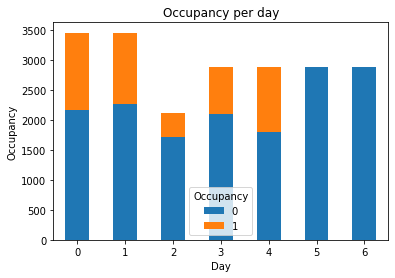

In [15]:
pclass_xt.plot(kind='bar', stacked=True, 
                   title='Occupancy per day',rot=0)
plt.xlabel('Day')
plt.ylabel('Occupancy')
plt.show()

In [16]:
df.corr()

,Temperature,Humidity,Light,CO2,Day,Hour,Occupancy
Temperature,1.000000,-0.156964,0.688571,0.449989,-0.243119,0.235753,0.555610
Humidity,-0.156964,1.000000,-0.029459,0.299746,-0.046364,0.115163,0.046240
Light,0.688571,-0.029459,1.000000,0.448105,-0.187750,0.094259,0.914850
CO2,0.449989,0.299746,0.448105,1.000000,-0.468756,0.127407,0.501582
Day,-0.243119,-0.046364,-0.187750,-0.468756,1.000000,-0.010997,-0.284638
Hour,0.235753,0.115163,0.094259,0.127407,-0.010997,1.000000,0.103108
Occupancy,0.555610,0.046240,0.914850,0.501582,-0.284638,0.103108,1.000000


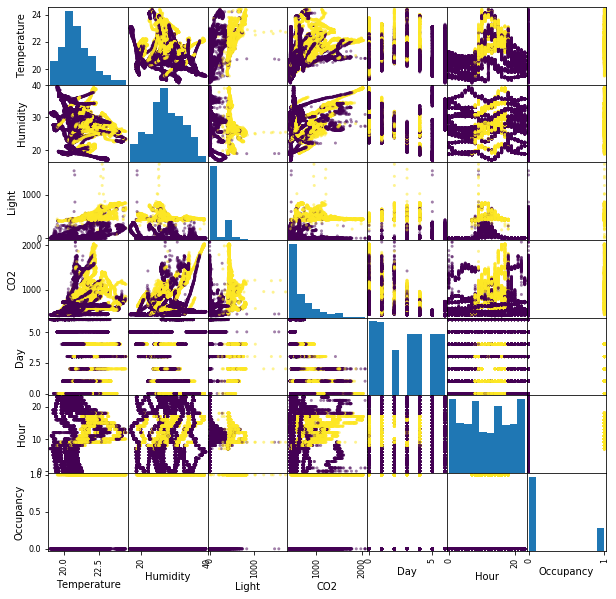

In [10]:
pd.plotting.scatter_matrix(df, c=df['Occupancy'], figsize=[10, 10])
plt.show()

Non abbiamo missing values e nemmeno attributi nominali da convertire in attributi 
numerici quindi io direi di non fare nessuna delle funzioni di data preparation
date dal prof

## Data Partitioning

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score ,cross_val_predict

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [18]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

## K-nn

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
y_pred = clf.predict(X_test)

In [22]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9917315175097277
F1-score [0.99461059 0.98224852]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.97      0.99      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [23]:
clf = KNeighborsClassifier(n_neighbors=10, weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.99189364461738
F1-score [0.99471347 0.98262682]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4743
           1       0.97      0.99      0.98      1425

    accuracy                           0.99      6168
   macro avg       0.99      0.99      0.99      6168
weighted avg       0.99      0.99      0.99      6168



In [24]:
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

Accuracy: 0.9782 (+/- 0.017)
F1-score: 0.9703 (+/- 0.023)


In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
parameters = {'n_neighbors': np.arange(1, 20 + 1), 'weights':['uniform', 'distance']}

knn = KNeighborsClassifier()
search = GridSearchCV(knn, parameters)
search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
clf = search.best_estimator_

In [28]:
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')


In [29]:
y_pred = clf.predict(X_test)
y_pred_tr = clf.predict(X_train)

In [30]:
y_score=clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

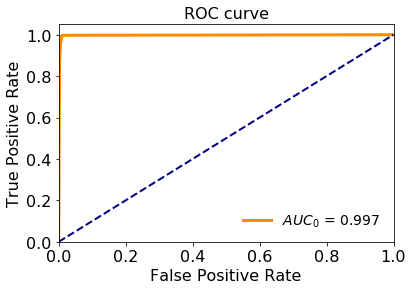

In [31]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [32]:
import matplotlib.pyplot as plt
import scikitplot as skplt

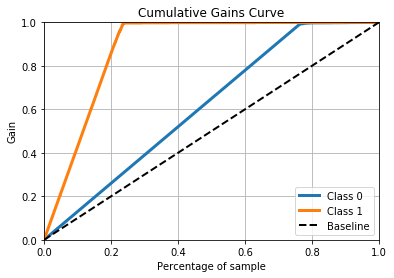

In [33]:
skplt.metrics.plot_cumulative_gain(y_test, y_score)

plt.show()

## NAIVE BAYES

In [99]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [100]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [101]:
y_pred = clf.predict(X_test)

In [102]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9667639429312581
F1-score [0.97793089 0.93272071]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      4743
           1       0.88      1.00      0.93      1425

    accuracy                           0.97      6168
   macro avg       0.94      0.98      0.96      6168
weighted avg       0.97      0.97      0.97      6168



In [103]:
y_score=clf.predict_proba(X_test)

In [104]:
import matplotlib.pyplot as plt
import scikitplot as skplt

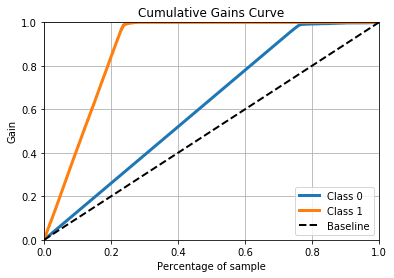

In [105]:
skplt.metrics.plot_cumulative_gain(y_test, y_score)

plt.show()

In [106]:
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

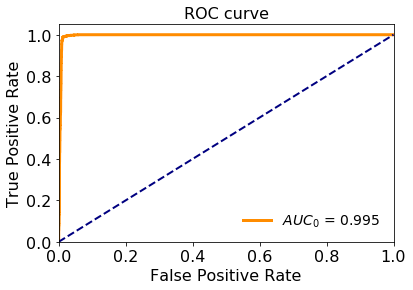

In [107]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()